In [1]:
from google.colab import drive

drive.mount("/content/drive/")

Mounted at /content/drive/


In [2]:
path_to_csv = "/content/drive/MyDrive/UIT - Semester 6/Data Analysis in Business/Dataset"

In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv(path_to_csv + "/TSLA.csv")

In [5]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-01,20.362667,20.688000,20.336666,20.435333,20.435333,64393500
1,2017-12-04,20.433332,20.551332,20.040667,20.346666,20.346666,87526500
2,2017-12-05,20.133333,20.533333,20.066668,20.246668,20.246668,69697500
3,2017-12-06,20.006666,20.892668,20.000000,20.884001,20.884001,107929500
4,2017-12-07,20.799999,21.242001,20.736668,20.749332,20.749332,71709000


In [6]:
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [7]:
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [8]:
train_data

,Close
0,20.435333
1,20.346666
2,20.246668
3,20.884001
4,20.749332
...,...
966,260.196655
967,260.916656
968,264.536682
969,261.829987


In [9]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data["Close"])

In [10]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [11]:
model = SimpleExpSmoothing(train_data, initialization_method="estimated").fit()

In [12]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])

x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])

In [13]:
y_pred = model.forecast(len(x_test))

In [14]:
y_pred

971     263.839132
972     263.839132
973     263.839132
974     263.839132
975     263.839132
           ...    
1243    263.839132
1244    263.839132
1245    263.839132
1246    263.839132
1247    263.839132
Length: 277, dtype: float64

In [15]:
y_pred_val = model.forecast(len(x_val))

In [16]:
y_pred_val

971     263.839132
972     263.839132
973     263.839132
974     263.839132
975     263.839132
           ...    
1106    263.839132
1107    263.839132
1108    263.839132
1109    263.839132
1110    263.839132
Length: 140, dtype: float64

In [17]:
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

y_next_30_days = model.forecast(len(x_next_30_days))

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
971     263.839132
972     263.839132
973     263.839132
974     263.839132
975     263.839132
976     263.839132
977     263.839132
978     263.839132
979     263.839132
980     263.839132
981     263.839132
982     263.839132
983     263.839132
984     263.839132
985     263.839132
986     263.839132
987     263.839132
988     263.839132
989     263.839132
990     263.839132
991     263.839132
992     263.839132
993     263.839132
994     263.839132
995     263.839132
996     263.839132
997     263.839132
998     263.839132
999     263.839132
1000    263.839132
dtype: float64


In [18]:
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
print('Validation RMSE:', valid_rmse)

test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

Validation RMSE: 93.7224717812265
Testing RMSE: 58.14239533243533


In [19]:
import matplotlib.pyplot as plt

%matplotlib inline

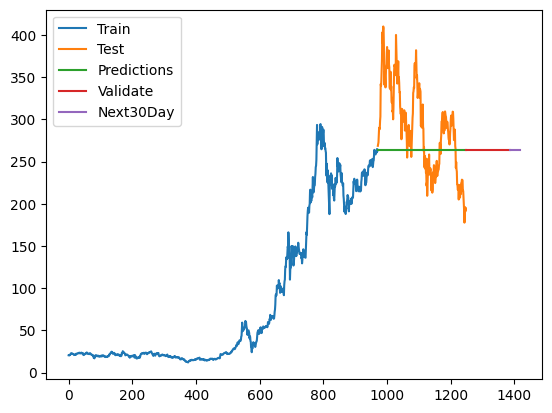

In [20]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()